Iniciando a classificação do dataset Padronizado

In [175]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

df_scaled = pd.read_parquet('../data/scaled_ACC_INTAKES_OUTCOMES.parquet')

df_scaled.head()


,age_upon_outcome,animal_id_outcome,date_of_birth,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,...,is_mix_breed,processed_color,color_Black,color_Brown/Chocolate,color_Gray/Blue,color_Other_Colors,color_Patterned,color_Red/Orange,color_White,color_Yellow/Gold/Cream
0,10 years,A047759,02/04/2004 00:00,3650,10.0,"(7.5, 10.0]",07/04/2014 15:12,4,2014,2014-04,...,0,Tricolor,False,False,False,False,True,False,False,False
1,14 years,A197810,21/01/2000 00:00,5110,14.0,"(12.5, 15.0]",22/12/2014 15:23,12,2014,2014-12,...,1,multi,False,False,False,True,False,False,False,False
2,16 years,A200922,03/10/1997 00:00,5840,16.0,"(15.0, 17.5]",22/11/2013 09:44,11,2013,2013-11,...,1,multi,False,False,False,True,False,False,False,False
3,14 years,A208755,27/04/2000 00:00,5110,14.0,"(12.5, 15.0]",17/02/2015 16:25,2,2015,2015-02,...,1,multi,False,False,False,True,False,False,False,False
4,17 years,A210457,01/06/1999 00:00,6205,17.0,"(15.0, 17.5]",07/10/2016 12:34,10,2016,2016-10,...,0,multi,False,False,False,True,False,False,False,False


Denifir as features que serão utilizadas na classificação do dataset Padronizado.

In [176]:
X = df_scaled[[
    "dob_year_scaled", "age_upon_intake_(days)_scaled", "age_upon_intake_(years)_scaled", "intake_month_scaled",
    "intake_year_scaled", "age_upon_outcome_(days)_scaled", "age_upon_outcome_(years)_scaled",
    "outcome_month_scaled", "outcome_year_scaled", "time_in_shelter_days_scaled",
    "sex_upon_outcome_Intact Female", "sex_upon_outcome_Intact Male  ", "sex_upon_outcome_Neutered Male",
    "sex_upon_outcome_Spayed Female", "sex_upon_outcome_Unknown      ", "animal_type_Bir", "animal_type_Cat",
    "animal_type_Dog", "animal_type_Oth", "intake_condition_Aged   ", "intake_condition_Feral  ",
    "intake_condition_Injured", "intake_condition_Normal ", "intake_condition_Nursing", "intake_condition_Other  ",
    "intake_condition_Pregnan", "intake_condition_Sick   ", "intake_type_Euthanasia Request",
    "intake_type_Owner Surrender   ", "intake_type_Public Assist     ", "intake_type_Stray             ",
    "intake_type_Wildlife          ", "sex_upon_intake_Intact Female", "sex_upon_intake_Intact Male  ",
    "sex_upon_intake_Neutered Male", "sex_upon_intake_Spayed Female", "sex_upon_intake_Unknown      ",
    "age_upon_outcome_age_group_encoded", "age_upon_intake_age_group_encoded", "is_mix_breed", "color_Black",
    "color_Brown/Chocolate", "color_Gray/Blue", "color_Other_Colors", "color_Patterned", "color_Red/Orange",
    "color_White", "color_Yellow/Gold/Cream"
]]

Definindo variáveis alvo:

In [177]:
y = df_scaled[["outcome_type_Adoption       ", "outcome_type_Euthanasia     ", "outcome_type_Transfer       ", "outcome_type_Died           ",
               "outcome_type_Missing        ", "outcome_type_Return to Owner"]]


Verificando o balanceamento entre as classes alvo:

In [178]:
count_adoption = y["outcome_type_Adoption       "].value_counts()
count_euthanasia = y["outcome_type_Euthanasia     "].value_counts()
count_transfer = y["outcome_type_Transfer       "].value_counts()
count_died = y["outcome_type_Died           "].value_counts()
count_return_owner = y["outcome_type_Return to Owner"].value_counts()
count_missing = y["outcome_type_Missing        "].value_counts()

print("Quantidade de animais adotados:")
print(f"Adotados: {count_adoption[True]}")
print(f"Não adotados: {count_adoption[False]}\n")

print("Quantidade de animais eutanasiados:")
print(f"Eutanasiados: {count_euthanasia[True]}")
print(f"Não eutanasiados: {count_euthanasia[False]}\n")

print("Quantidade de animais transferidos:")
print(f"Transferidos: {count_transfer[True]}")
print(f"Não transferidos: {count_transfer[False]}\n")

print("Quantidade de animais mortos:")
print(f"Mortos: {count_died[True]}")
print(f"Não mortos: {count_died[False]}\n")

print("Quantidade de animais devolvidos aos donos:")
print(f"Devolvidos aos donos: {count_return_owner[True]}")
print(f"Não devolvidos aos donos: {count_return_owner[False]}\n")

print("Quantidade de animais desaparecidos:")
print(f"Desaparecidos: {count_missing[True]}")
print(f"Não desaparecidos: {count_missing[False]}")




Quantidade de animais adotados:
Adotados: 5806
Não adotados: 28552

Quantidade de animais eutanasiados:
Eutanasiados: 5907
Não eutanasiados: 28451

Quantidade de animais transferidos:
Transferidos: 22044
Não transferidos: 12314

Quantidade de animais mortos:
Mortos: 573
Não mortos: 33785

Quantidade de animais devolvidos aos donos:
Devolvidos aos donos: 1
Não devolvidos aos donos: 34357

Quantidade de animais desaparecidos:
Desaparecidos: 27
Não desaparecidos: 34331


Há um grande desequilíbrio entre as classes, como os casos de "Devolvidos aos donos" e "Desaparecidos", que possuem muito poucas instâncias.

Como a representação de instancias "Devolvidos ao dono" e "Desaparecidos" são poucos, iremos unir essas classes e formar a classe "Outros", indicando outro tipo de saída.

In [179]:
# Criar uma cópia do DataFrame original para evitar o SettingWithCopyWarning
y = y.copy()

# Criar a nova coluna "outcome_type_Other" de forma segura
y['outcome_type_Other'] = y['outcome_type_Missing        '] | y['outcome_type_Return to Owner']

# Remover as colunas originais "outcome_type_Missing" e "outcome_type_Return to Owner"
y = y.drop(columns=['outcome_type_Missing        ', 'outcome_type_Return to Owner'])

# Verificar a nova distribuição de classes após a modificação
print("Nova distribuição das classes:")
print(y.sum())



Nova distribuição das classes:
outcome_type_Adoption            5806
outcome_type_Euthanasia          5907
outcome_type_Transfer           22044
outcome_type_Died                 573
outcome_type_Other                 28
dtype: int64


Divisão do Dataset em Treino e Teste:
Vamos dividir o dataset usando uma proporção de 70% para treino e 30% para teste.

In [180]:
from sklearn.model_selection import train_test_split

# Dividir o dataset em treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Verificar a distribuição das classes no conjunto de treino e teste
print("Distribuição das classes no conjunto de treino:")
print(y_train.sum())
print("\nDistribuição das classes no conjunto de teste:")
print(y_test.sum())



Distribuição das classes no conjunto de treino:
outcome_type_Adoption            4064
outcome_type_Euthanasia          4135
outcome_type_Transfer           15430
outcome_type_Died                 401
outcome_type_Other                 20
dtype: int64

Distribuição das classes no conjunto de teste:
outcome_type_Adoption           1742
outcome_type_Euthanasia         1772
outcome_type_Transfer           6614
outcome_type_Died                172
outcome_type_Other                 8
dtype: int64


Aplicação do SMOTE no conjunto de treino

In [181]:
# Converter as colunas de 'y' para uma única coluna que representa a classe de saída
y_train_combined = y_train.idxmax(axis=1)
y_test_combined = y_test.idxmax(axis=1)

# Aplicar o SMOTE no conjunto de treino
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train_combined)

# Verificar a nova distribuição após o SMOTE
print("Nova distribuição após o SMOTE (conjunto de treino):")
print(pd.Series(y_train_res).value_counts())




Nova distribuição após o SMOTE (conjunto de treino):
outcome_type_Adoption           15430
outcome_type_Transfer           15430
outcome_type_Euthanasia         15430
outcome_type_Died               15430
outcome_type_Other              15430
Name: count, dtype: int64


Treinando o modelo Random Forest:

In [200]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np

# Definir os rótulos personalizados
target_names = ['Adotado', 'Morto', 'Eutanasiado', 'Outro', 'Transferido']

# Treinar o modelo Random Forest com o conjunto de treino balanceado (após o SMOTE)
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_res, y_train_res)

# Fazer previsões no conjunto de teste
y_pred = rf_classifier.predict(X_test)

# Exibir o relatório de classificação com os rótulos personalizados
print("Relatório de Classificação (Random Forest):")
print(classification_report(y_test_combined, y_pred, target_names=target_names))

# Exibir a matriz de confusão formatada com os rótulos personalizados
print("Matriz de Confusão (Random Forest):")
conf_matrix = confusion_matrix(y_test_combined, y_pred)

# Mostrar a matriz de confusão formatada com os rótulos personalizados para melhor visualização
conf_matrix_df = pd.DataFrame(conf_matrix, index=target_names, columns=target_names)
print(conf_matrix_df)


Relatório de Classificação (Random Forest):
              precision    recall  f1-score   support

     Adotado       0.85      0.85      0.85      1742
       Morto       0.29      0.14      0.19       172
 Eutanasiado       0.83      0.74      0.78      1772
       Outro       0.50      0.12      0.20         8
 Transferido       0.89      0.93      0.91      6614

    accuracy                           0.87     10308
   macro avg       0.67      0.56      0.58     10308
weighted avg       0.86      0.87      0.86     10308

Matriz de Confusão (Random Forest):
             Adotado  Morto  Eutanasiado  Outro  Transferido
Adotado         1482      9            6      0          245
Morto              8     24           46      0           94
Eutanasiado       30     19         1304      0          419
Outro              2      0            0      1            5
Transferido      223     32          221      1         6137


Treinando o modelo SVM

In [201]:
import pandas as pd

# Mapeamento das classes para valores numéricos
label_mapping = {
    'outcome_type_Adoption       ': 0,
    'outcome_type_Euthanasia     ': 1,
    'outcome_type_Transfer       ': 2,
    'outcome_type_Died           ': 3,
    'outcome_type_Other': 4
}

# Aplicar o mapeamento no conjunto de treino
y_train_res_single = y_train_res.replace(label_mapping)

# Treinar o modelo SVM com o conjunto de treino balanceado (após o SMOTE)
svm_model = SVC(random_state=42)
svm_model.fit(X_train_res, y_train_res_single)

# Fazer previsões no conjunto de teste
y_pred_svm = svm_model.predict(X_test)

# Avaliar o modelo SVM

print("\nRelatório de Classificação (SVM):")
print(classification_report(y_test_single, y_pred_svm, target_names=['Adotado', 'Eutanasiado', 'Transferido', 'Morto', 'Outro']))

# Obter a matriz de confusão e exibi-la de forma organizada
confusion_svm = confusion_matrix(y_test_single, y_pred_svm)

# Criar um DataFrame para exibir a matriz de confusão de maneira organizada
confusion_df_svm = pd.DataFrame(confusion_svm, index=['Adotado', 'Eutanasiado', 'Transferido', 'Morto', 'Outro'],
                                columns=['Adotado', 'Eutanasiado', 'Transferido', 'Morto', 'Outro'])

# Exibir a matriz de confusão organizada
print("\nMatriz de Confusão (SVM):")
print(confusion_df_svm)


C:\Users\julia\AppData\Local\Temp\ipykernel_24960\2327386496.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train_res_single = y_train_res.replace(label_mapping)



Relatório de Classificação (SVM):
              precision    recall  f1-score   support

     Adotado       0.79      0.87      0.83      1742
 Eutanasiado       0.74      0.74      0.74      1772
 Transferido       0.89      0.85      0.87      6614
       Morto       0.10      0.20      0.13       172
       Outro       0.33      0.25      0.29         8

    accuracy                           0.82     10308
   macro avg       0.57      0.58      0.57     10308
weighted avg       0.84      0.82      0.83     10308


Matriz de Confusão (SVM):
             Adotado  Eutanasiado  Transferido  Morto  Outro
Adotado         1508           19          196     18      1
Eutanasiado       25         1315          396     36      0
Transferido      360          383         5619    250      2
Morto              5           57           75     34      1
Outro              1            0            4      1      2


Treinando o modelo XGBoost

In [202]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

# Inicializar o modelo XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)

# Treinar o modelo XGBoost com o conjunto de treino balanceado (após o SMOTE)
xgb_model.fit(X_train_res, y_train_res_single)

# Fazer previsões no conjunto de teste
y_pred_xgb = xgb_model.predict(X_test)

# Avaliar o modelo XGBoost

print("\nRelatório de Classificação (XGBoost):")
print(classification_report(y_test_single, y_pred_xgb, target_names=['Adotado', 'Eutanasiado', 'Transferido', 'Morto', 'Outro']))

# Exibir a matriz de confusão
print("Matriz de Confusão (XGBoost):")
print(pd.DataFrame(confusion_matrix(y_test_single, y_pred_xgb), 
                   index=['Adotado', 'Eutanasiado', 'Transferido', 'Morto', 'Outro'], 
                   columns=['Adotado', 'Eutanasiado', 'Transferido', 'Morto', 'Outro']))



Relatório de Classificação (XGBoost):
              precision    recall  f1-score   support

     Adotado       0.86      0.84      0.85      1742
 Eutanasiado       0.87      0.73      0.79      1772
 Transferido       0.88      0.94      0.91      6614
       Morto       0.33      0.13      0.18       172
       Outro       0.25      0.12      0.17         8

    accuracy                           0.87     10308
   macro avg       0.64      0.55      0.58     10308
weighted avg       0.87      0.87      0.87     10308

Matriz de Confusão (XGBoost):
             Adotado  Eutanasiado  Transferido  Morto  Outro
Adotado         1470            3          266      3      0
Eutanasiado       23         1295          439     15      0
Transferido      215          157         6212     27      3
Morto              8           42          100     22      0
Outro              0            0            7      0      1


Para validar se tá acontecendo overfitting, usaremos a técnica de Validação Cruzada (cross-validation).

Os dados de treino serão divididos em K partes (ou "folds"). O modelo é treinado em K-1 partes e validado na parte restante, repetindo isso K vezes. O desempenho é então avaliado pela média dos resultados.

In [204]:
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Criar os modelos
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(kernel='linear', random_state=42)
xgb_model = xgb.XGBClassifier(random_state=42)

# Lista para armazenar os modelos e seus nomes
models = {
    'Random Forest': rf_model,
    'SVM': svm_model,
    'XGBoost': xgb_model
}

# Loop para realizar a validação cruzada em cada modelo
for model_name, model in models.items():
    print(f"\nValidação Cruzada para {model_name}")
    
    # Realizar a validação cruzada com 5 folds
    cv_scores = cross_val_score(model, X_train_res, y_train_res_single, cv=5, scoring='accuracy')
    
    # Exibir os resultados
    print(f"Acurácia por fold na Validação Cruzada: {cv_scores}")
    print(f"Média da Acurácia: {cv_scores.mean()}")
    print(f"Desvio padrão: {cv_scores.std()}")



Validação Cruzada para Random Forest
Acurácia por fold na Validação Cruzada: [0.92248866 0.95994815 0.96966948 0.97148412 0.97407647]
Média da Acurácia: 0.9595333765392093
Desvio padrão: 0.019128751547727182

Validação Cruzada para SVM
Acurácia por fold na Validação Cruzada: [0.79157485 0.82559948 0.82838626 0.82845107 0.83596889]
Média da Acurácia: 0.8219961114711601
Desvio padrão: 0.01559600106676463

Validação Cruzada para XGBoost
Acurácia por fold na Validação Cruzada: [0.87990927 0.95191186 0.96824368 0.97012314 0.97051199]
Média da Acurácia: 0.9481399870382372
Desvio padrão: 0.03480684409770464


Com base nesses resultados, Random Forest é o melhor modelo para este conjunto de dados, oferecendo uma excelente combinação de alta acurácia e estabilidade (baixo desvio padrão). O XGBoost também é uma boa escolha, mas o Random Forest se destaca ligeiramente em termos de performance e consistência.

Curva de aprendizado do Random Forest

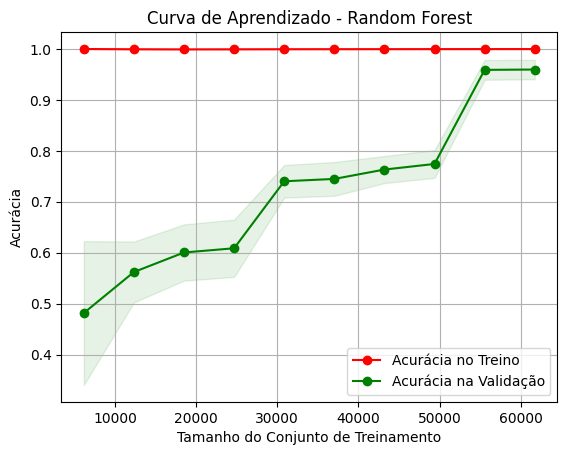

In [205]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold

# Definir o modelo Random Forest
rf_classifier = RandomForestClassifier(random_state=42)

# Definir o número de divisões para a validação cruzada
cv = StratifiedKFold(n_splits=5)

# Gerar os valores da curva de aprendizado
train_sizes, train_scores, test_scores = learning_curve(
    rf_classifier, X_train_res, y_train_res, cv=cv, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calcular a média e desvio padrão das pontuações de treino e teste
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotar a curva de aprendizado
plt.figure()
plt.title('Curva de Aprendizado - Random Forest')
plt.xlabel('Tamanho do Conjunto de Treinamento')
plt.ylabel('Acurácia')

# Curva de treino
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Acurácia no Treino')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')

# Curva de teste/validação
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Acurácia na Validação')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')

# Exibir a legenda e o gráfico
plt.legend(loc='best')
plt.grid(True)
plt.show()



A curva de aprendizado do Random Forest mostra um ótimo desempenho do modelo conforme o tamanho do conjunto de treinamento aumenta. 

A linha vermelha indica a acurácia no conjunto de treino, que se mantém consistentemente alta, enquanto a linha verde mostra a acurácia no conjunto de validação, que também melhora gradualmente com mais dados de treino.

Visualização das Features Importance

15 Features mais importantes:
                            Feature  Importance
9       time_in_shelter_days_scaled    0.172290
6   age_upon_outcome_(years)_scaled    0.060830
5    age_upon_outcome_(days)_scaled    0.060533
1     age_upon_intake_(days)_scaled    0.053293
11   sex_upon_outcome_Intact Male      0.041827
2    age_upon_intake_(years)_scaled    0.041705
7              outcome_month_scaled    0.039568
3               intake_month_scaled    0.038927
0                   dob_year_scaled    0.037345
8               outcome_year_scaled    0.034611
4                intake_year_scaled    0.033194
10   sex_upon_outcome_Intact Female    0.029446
31   intake_type_Wildlife              0.023262
13   sex_upon_outcome_Spayed Female    0.022788
18                  animal_type_Oth    0.020637


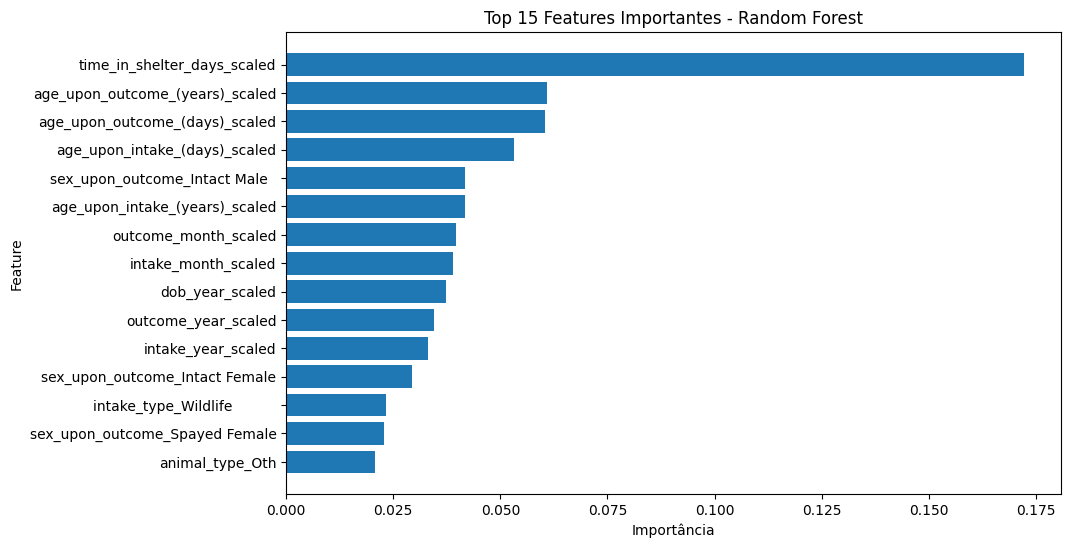

In [210]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd

# Treinar o modelo Random Forest com o conjunto de treino balanceado (após o SMOTE)
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_res, y_train_res)

# Obter a importância das features a partir do modelo Random Forest
feature_importances = rf_classifier.feature_importances_

# Criar um DataFrame para exibir as features e suas importâncias
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Exibir as 10 features mais importantes
print("15 Features mais importantes:")
print(feature_importance_df.head(15))

# Visualizar a importância das features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'].head(15), feature_importance_df['Importance'].head(15))
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.title('Top 15 Features Importantes - Random Forest')
plt.gca().invert_yaxis()  # Para exibir a barra mais importante no topo
plt.show()
